<a href="https://colab.research.google.com/github/FrenchFreis/CCDATSCL_EXERCISES_COM222/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [109]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import chi2_contingency


## Part 1: ANOVA

A teacher wants to investigate whether different teaching methods affect students’ exam scores. The dataset contains 50 students, each assigned to one of three teaching methods (A, B, or C).

Question: "Is there a difference in mean exam scores among students taught using three different teaching methods?"

- Independent variable (factor): Teaching Method (A, B, C)
- Dependent variable: Exam Score (numeric)

In [110]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/exam_scores.csv?raw=true"

df_exam_scores = pd.read_csv(url)
df_exam_scores


,StudentID,Method,Score
0,1,A,79
1,2,A,77
2,3,A,82
3,4,A,75
4,5,A,80
5,6,A,78
6,7,A,83
7,8,A,76
8,9,A,81
9,10,A,74


Calculate the number of students in each teaching method.

In [111]:
print(df_exam_scores['Method'].value_counts())


Method
A    17
B    17
C    16
Name: count, dtype: int64


Compute the mean and standard deviation of exam scores for each group.

In [112]:
mean_standard = df_exam_scores.groupby('Method')['Score'].agg(['mean', 'std'])
print(mean_standard)

             mean       std
Method                     
A       78.588235  2.575336
B       86.294118  2.365500
C       71.937500  1.768945


Use a plot to show the exam scores by teaching method.

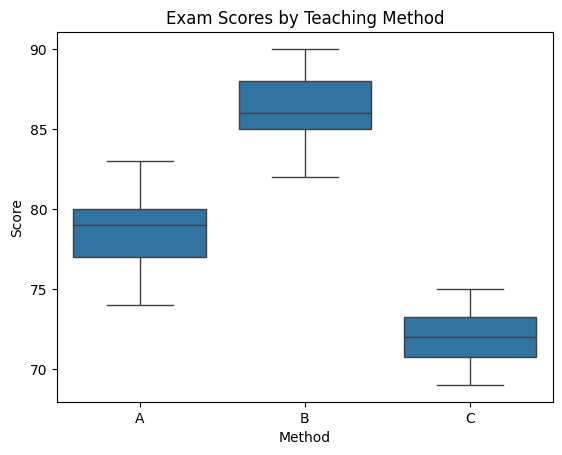

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Method', y='Score', data=df_exam_scores)
plt.title('Exam Scores by Teaching Method')
plt.show()

Perform the ANOVA Test
- Use scipy.stats.f_oneway to conduct a one-way ANOVA.
- Report the F-statistic and p-value.
- Using a significance level of α = 0.05, state whether you reject or fail to reject H₀.

In [114]:
A = df_exam_scores[df_exam_scores['Method'] == 'A']['Score']
B = df_exam_scores[df_exam_scores['Method'] == 'B']['Score']
C = df_exam_scores[df_exam_scores['Method'] == 'C']['Score']

f_stat, p_val = stats.f_oneway(A, B, C)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4e}")

alpha = 0.05
if p_val < alpha:
    print("Decision: Reject the Null Hypothesis (H0)")
else:
    print("Decision: Fail to Reject the Null Hypothesis (H0)")

F-statistic: 165.1785
p-value: 5.5033e-22
Decision: Reject the Null Hypothesis (H0)


Interpret the results. What does it say about the relationship between teaching method and exam scores?

In [115]:
print("There is a significant difference between the scores between the methods, with Group B being the highest and Group C being the lowest")

There is a significant difference between the scores between the methods, with Group B being the highest and Group C being the lowest


## Part 2: Chi-squared

A survey was conducted to see if there is a relationship between gender and littering behavior.

Question:
"Is gender associated with littering behavior?"

Each row represents one person.

In [116]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/litteringdata.csv?raw=true"

df_littering_data = pd.read_csv(url)
df_littering_data

,ID,Gender,Litter
0,1,Male,Yes
1,2,Male,Yes
2,3,Male,Yes
3,4,Male,Yes
4,5,Male,Yes
5,6,Male,Yes
6,7,Male,Yes
7,8,Male,Yes
8,9,Male,Yes
9,10,Male,Yes


Count the number of observations in each category for Gender and Litter separately.

In [117]:
print(df_littering_data['Gender'].value_counts())
print(df_littering_data['Litter'].value_counts())


Gender
Male      20
Female    20
Name: count, dtype: int64
Litter
No     22
Yes    18
Name: count, dtype: int64


Using `pd.crosstab()`, create a contingency table showing counts of littering behavior for each gender.
- Write down the row totals, column totals, and grand total from the table.

In [118]:
contingency = pd.crosstab(df_littering_data['Gender'],
                                df_littering_data['Litter'],
                                margins=True)
print(contingency)

Litter  No  Yes  All
Gender              
Female  14    6   20
Male     8   12   20
All     22   18   40


State the null hypothesis (H₀) and alternative hypothesis (H₁) for this chi-squared test.

In [119]:
print("""Null: Gender and littering behavior is not associated with each other
Alternative: Gender and littering behavior are associated.""")

Null: Gender and littering behavior is not associated with each other
Alternative: Gender and littering behavior are associated.


Use scipy.stats.chi2_contingency to calculate:
- Chi-squared statistic
- p-value
- Degrees of freedom

Using a significance level of `α = 0.05`, determine whether to reject or fail to reject H₀.


In [120]:
table_for_test = pd.crosstab(df_littering_data['Gender'], df_littering_data['Litter'])

chi2, p, dof, expected = chi2_contingency(table_for_test)

print(f"Chi-squared Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

if p < 0.05:
    print("Significant difference found (reject Null Hypothesis H0)")
else:
    print("No significant difference found (fail reject Null Hypothesis H0)")

Chi-squared Statistic: 2.5253
p-value: 0.1120
Degrees of Freedom: 1
No significant difference found (fail reject Null Hypothesis H0)


In [121]:
print(table_for_test)

Litter  No  Yes
Gender         
Female  14    6
Male     8   12


Interpret your results. Is there evidence that gender and littering behavior are associated?

In [122]:
print("Gender and littering behavior is not with each other. Given the data 12/20 of Males have been known to litter while compared with the 6/20 of Females. ")

Gender and littering behavior is not with each other. Given the data 12/20 of Males have been known to litter while compared with the 6/20 of Females. 
